### Objetivo del proyecto

- Un Modelo que optimize la cantidad de oro extraido del mineral de oro

#### Descripción de datos
**Proceso tecnológico**

- Rougher feed: materia prima  
- Rougher additions (o adiciones de reactivos): reactivos de flotación: xantato, sulfato, depresante  
  - Xantato: promotor o activador de la flotación  
  - Sulfato: sulfuro de sodio para este proceso en particular  
  - Depresante: silicato de sodio  
- Rougher process: flotación  
- Rougher tails: residuos del producto  
- Float banks: instalación de flotación  
- Cleaner process: purificación  
- Rougher Au: concentrado de oro rougher  
- Final Au: concentrado de oro final

**Parámetros de las etapas**

- air amount: volumen de aire
- fluid levels
- feed size: tamaño de las partículas de la alimentación
- feed rate

### 0.1 📦 Importación de librerías

In [ ]:
# 0.1 Liberias Python
import pandas as pd 
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1.2 Constate aleatroria
RANDOM_STATE = 54321 

## 1. Prepara los datos



### 1.1 📂Abre los archivos y examina los datos.
Se usan tres archivos:

- `gold_recovery_full.csv`
- `gold_recovery_test.csv`
- `gold_recovery_train.csv`


In [12]:
# 1.1.1 Rutas del los archivos

BASE_DIR = Path.cwd()

RUTA_TRAIN = BASE_DIR / "gold_recovery_train.csv"
RUTA_TEST  = BASE_DIR / "gold_recovery_test.csv"
RUTA_FULL  = BASE_DIR / "gold_recovery_full.csv"

# 1.1.2 Carga de archivos 

df_train = pd.read_csv(RUTA_TRAIN, parse_dates=["date"], index_col=['date'])
df_test = pd.read_csv(RUTA_TEST, parse_dates=["date"], index_col=['date'])
df_full = pd.read_csv(RUTA_FULL, parse_dates=["date"], index_col=['date'])


In [13]:
# 1.1.3 # Revisar data sets 


print(df_train.shape, df_test.shape, df_full.shape)

(16860, 86) (5856, 52) (22716, 86)


In [14]:
# 1.1.4 # Revisar data set df_train
print(df_train.info())
print(df_train.head(3))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [15]:
# 1.1.5 Revisar data set df_test
print(df_test.info())
print(df_test.head(3))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

In [16]:
# 1.1.6 Revisar data set df_full
print(df_full.info())
print(df_full.head(3))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

### Valores Nulos 

In [17]:
# 1.1.7 Revición de valores nulos de todos los data sets 
print('Total de columnas con todos los valores nulos en df_train:', int(df_train.isna().all(axis=1).sum()))
print('Total de columnas con todos los valores nulos en df_test:', int(df_test.isna().all(axis=1).sum()))
print('Total de columnas con todos los valores nulos en df_full:', int(df_full.isna().all(axis=1).sum()), '\n')

print('Data set df_train no cuenta con valores nuelos:', print(df_train.isna().sum().sum()==0))
print('Data set df_test no cuenta con valores nuelos:', print(df_test.isna().sum().sum()==0))
print('Data set df_full no cuenta con valores nuelos:', print(df_full.isna().sum().sum()==0), '\n')

print('Total de valores de nulos en df_train:', df_train.isna().sum().sum())
print('Total de valores de nulos en df_test:', df_test.isna().sum().sum())
print('Total de valores de nulos en df_full:', df_full.isna().sum().sum(), '\n')

Total de columnas con todos los valores nulos en df_train: 0
Total de columnas con todos los valores nulos en df_test: 0
Total de columnas con todos los valores nulos en df_full: 0 

False
Data set df_train no cuenta con valores nuelos: None
False
Data set df_test no cuenta con valores nuelos: None
False
Data set df_full no cuenta con valores nuelos: None 

Total de valores de nulos en df_train: 30320
Total de valores de nulos en df_test: 2360
Total de valores de nulos en df_full: 36587 



### Valores Duplicados

In [18]:
# # 1.1.8 Revición de valores duplicados de todos los data sets 
print('Total de columnas con todos los valores Duplicados en df_train:', int(df_train.duplicated().sum()))
print('Total de columnas con todos los valores Duplicados en df_train:', int(df_train.duplicated().sum()))
print('Total de columnas con todos los valores Duplicados en df_train:', int(df_train.duplicated().sum()), '\n')


print('Data set df_train no cuenta con valores Duplicados la fecha (index):', print(df_train.index.duplicated().sum().sum()==0))
print('Data set df_train no cuenta con valores Duplicados la fecha (index):', print(df_test.index.duplicated().sum().sum()==0))
print('Data set df_train no cuenta con valores Duplicados la fecha (index):', print(df_full.index.duplicated().sum().sum()==0), '\n')

print('Data set df_train no cuenta con valores Duplicados:', print(df_train.duplicated().sum().sum()==0))
print('Data set df_train no cuenta con valores Duplicados:', print(df_test.duplicated().sum().sum()==0))
print('Data set df_train no cuenta con valores Duplicados:', print(df_full.duplicated().sum().sum()==0), '\n')

print('Total de valores de Duplicados en df_train:', df_train.duplicated().sum().sum())
print('Total de valores de Duplicados en df_train:', df_test.duplicated().sum().sum())
print('Total de valores de Duplicados en df_train:', df_full.duplicated().sum().sum(), '\n')

Total de columnas con todos los valores Duplicados en df_train: 16
Total de columnas con todos los valores Duplicados en df_train: 16
Total de columnas con todos los valores Duplicados en df_train: 16 

True
Data set df_train no cuenta con valores Duplicados la fecha (index): None
True
Data set df_train no cuenta con valores Duplicados la fecha (index): None
True
Data set df_train no cuenta con valores Duplicados la fecha (index): None 

False
Data set df_train no cuenta con valores Duplicados: None
False
Data set df_train no cuenta con valores Duplicados: None
False
Data set df_train no cuenta con valores Duplicados: None 

Total de valores de Duplicados en df_train: 16
Total de valores de Duplicados en df_train: 6
Total de valores de Duplicados en df_train: 22 



## Conclución 

Los data sets `df_train` y `df_full` contienen 86 columnas mientras él data set `df_test` tiene 56 columnas, ninguno de los data sets tiene toda la fila con todos los valores nulos, algunos de los datos parecen duplicados en los 3 datasets, mientras que el índice que se estableció con la fecha no presenta ningún duplicado lo que puede decir que se lograron los mismos resultados en diferentes fechas, por lo que no será necesario eliminar esos duplicados, por otro lado Contamos con muchos valores nulos los cuales tendremos que trabajar para poder hacer nuestro modelo.

---


## 1.2 Comprueba que el cálculo de la recuperación sea correcto. 

- Calcula la recuperación de la característica  `rougher.output.recovery`  mediante el conjunto de entrenamiento.
- Encuentra el EAM entre tus cálculos y los valores de la característica. 
- Facilita los resultados.


### 1.2.1 Entender Los Datos

##### En Esta seccion busco entender el processo Rouhter y seleccionar los datos (columnas) que necesito para hcaer el calculo de la recuperación.

**Rougher additions (Reactivos de flotación)**
- Xantato: promotor o activador de la flotación:
  - `rougher.input.floatbank10_xanthate`-- processo Rougher
  - `rougher.input.floatbank11_xanthate`-- processo Rougher
  - `primary_cleaner.input.xanthate`-- Primera purificación  

- Sulfato: sulfuro de sodio para este proceso en particular:
  - `rougher.input.floatbank10_sulfate`-- processo Rougher
  - `rougher.input.floatbank11_sulfate`-- processo Rougher
  - `primary_cleaner.input.depressant`-- Primera purificación

- Depresante: silicato de sodio:
  - `primary_cleaner.input.sulfate`-- Primera purificación


##### **Materia prima** = **1** `rougher.input.feed_au`

#### **Concentrado Rougher**  

**Rougher Au: concentrado de oro rougher**
- **3** `rougher.output.concentrate_au`

**Concentrado de la primera limpieza**
- **5** `primary_cleaner_output.tail_au`

**Rougher tails: residuos del producto**     

  - **2**  `rougher.output.tail_au`
  - **4**  `primary_cleaner.output.tail_au`
  - **6**  `secondary_cleaner.output.tail_au`
  
**Colas Rougher**  (Total de Colas Roughter)
- **7** `final.output.tail_au`



**Final Au: concentrado de oro final**
- **8** `final.output.concentrate_au`

 


---

### Cálculo de la recuperación (`Concentrado Rougher`)
Tienes que simular el proceso de recuperación del oro del mineral de oro.  
Utiliza la siguiente fórmula para simular el proceso de recuperación:  
$$
Recuperación = \frac{c*(f-t)}{f*(c-t)}*100
$$

Donde:

Recuperación real = `rougher.output.recovery`

C: Para saber la recuperación del concentrado rougher → la proporción de oro en el concentrado justo después de la flotación  

c = `rougher.output.concentrate_au`  


F: Para saber la recuperación del concentrado rougher → la proporción de oro en la alimentación antes de la flotación.  

F = `rougher.input.feed_au`  

T: Para saber la recuperación del concentrado rougher → la proporción de oro en las colas rougher justo después de la flotación.  

T = `rougher.output.tail_au`  

### Cálculo de la recuperación (`Concentrado Final`)
Tienes que simular el proceso de recuperación del oro del mineral de oro.  
Utiliza la siguiente fórmula para simular el proceso de recuperación:  

$$
Recuperación = \frac{c*(f-t)}{f*(c-t)}*100
$$

Donde:

C: Para saber la recuperación del concentrado final → la proporción de oro después de la purificación.

c = `rougher.output.concentrate_au`  


F: Para saber la recuperación del concentrado final → la proporción de oro en el concentrado justo después de la flotación. 

F = `rougher.output.concentrate_au`  

T: Para saber la recuperación del concentrado final → la proporción total de oro en las colas rougher.

T = `final.output.tail_au`  

> No hay una columna con la recuperación real del concentrado final. Podemos calcularla para cada registro usando la fórmula, pero no podemos compararla con un valor real, así que no es posible evaluar el desempeño con MAE.

In [19]:
# 1.2.2 Comprobacion del Cálculo de la recuperación 

C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']


def recuperacion(C,F,T):
    recup = ((C*(F-T))/(F*(C-T)))*100
    return recup

recup_cal_rougher = recuperacion(C,F,T)
recup_real = df_train['rougher.output.recovery']

# Calcular el EAM 
mae = np.mean(np.abs(recup_cal_rougher - recup_real ))
print('Mean Absolute Error (MAE):', mae) 


Mean Absolute Error (MAE): 9.303415616264301e-15


---
### 1.3 Analiza las características no disponibles en el conjunto de prueba


¿Cuáles son estos parámetros? 

¿Cuál es su tipo?


In [20]:
# Revisamos las columas que no estan dentro del data set de prueba 
cols_diference = sorted(set(df_train.columns) - set(df_test.columns))

# Convertimos los datos a un lista e impimimos los nombres de cada tipo de dato
cols_faltantes = df_train[list(cols_diference)].dtypes.to_frame(name='dtype')

print(cols_faltantes,'\n')
print("Features en train pero NO en test:", len(cols_faltantes))


                                                      dtype
final.output.concentrate_ag                         float64
final.output.concentrate_au                         float64
final.output.concentrate_pb                         float64
final.output.concentrate_sol                        float64
final.output.recovery                               float64
final.output.tail_ag                                float64
final.output.tail_au                                float64
final.output.tail_pb                                float64
final.output.tail_sol                               float64
primary_cleaner.output.concentrate_ag               float64
primary_cleaner.output.concentrate_au               float64
primary_cleaner.output.concentrate_pb               float64
primary_cleaner.output.concentrate_sol              float64
primary_cleaner.output.tail_ag                      float64
primary_cleaner.output.tail_au                      float64
primary_cleaner.output.tail_pb          

### Conclución

Contamos con 34 Features (columnas) más en nuestro dataset de prueba que en nuestro data set de entrenamiento por lo que tenemos que igualar las los features antes de ponerlo en el modelo.

## 1.4. Realiza el preprocesamiento de datos.



In [21]:
# Comprobamos si esta ordenada la el índice por fecha
print("Train index sorted:", df_train.index.is_monotonic_increasing)

# Comprobamos Duplicados de temporalidades en nuestro data set de entrenamiento
print("\nDup timestamps (train):", df_train.index.duplicated().sum())

# comprobamos la cantidad de valores nuelos en nuesto data set de prueba
print('\nTotal de valores de nulos en df_test:', df_test.isna().sum().sum())

# Calculamos el % de valores nulos (NaN) por columna
print("\nPorcentaje de valores nulos:")
na_rate = (df_train.isna().mean().sort_values(ascending=False) * 100)
display(na_rate.head(20))

Train index sorted: True

Dup timestamps (train): 0

Total de valores de nulos en df_test: 2360

Porcentaje de valores nulos:


rougher.output.recovery                     15.260973
rougher.output.tail_ag                      13.345196
rougher.output.tail_sol                     13.339265
rougher.output.tail_au                      13.339265
secondary_cleaner.output.tail_sol           11.779359
rougher.input.floatbank11_xanthate          11.293001
final.output.recovery                        9.021352
primary_cleaner.input.sulfate                7.752076
primary_cleaner.input.depressant             7.485172
rougher.calculation.au_pb_ratio              7.366548
rougher.input.floatbank10_sulfate            6.192171
primary_cleaner.input.xanthate               5.842230
primary_cleaner.output.concentrate_sol       3.772242
rougher.input.floatbank11_sulfate            3.695136
rougher.state.floatbank10_e_air              3.576512
rougher.input.feed_rate                      3.042705
rougher.input.feed_size                      2.473310
final.output.concentrate_sol                 2.194543
secondary_cleaner.state.floa

---

## 1.4. Realiza el preprocesamiento de datos.


Checklist:

- Eliminamos los valores nulos para no sesgar la informacion.
- Rellenamos los Valores de los registros para el `df_test`.

In [22]:

# Eliminamos los valores nulos para no sesgar la informacion 
# Se hace un nuevo conjunto, al entrenar el modelo no queremos perder datos.
df_train_clean = df_train.dropna()

# Rellenamos los Valores de los registros para el df_test
df_test = df_test.fillna('ffill')

# Revisamos la forma de nuestros Data sets
print(f'Shape df_train:{df_train.shape}\nShape df_test: {df_test.shape}')

Shape df_train:(16860, 86)
Shape df_test: (5856, 52)


### Conclución

Dejaremos los datos de nuestro data set de entrenamiento limpios para la gráfica, aunque no me parece la mejor idea eliminar las columnas por los valores nulos, ya que se piedre mucha información, En mi opinión es mejor hacerlo antes de poner los datos en el modelo, me parece una mejor parctica, ya que las columnas que usaremos serán menores y sobre esas columnas eliminaremos los nulos.

---

## 2. Analiza los datos


### 2.1 Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

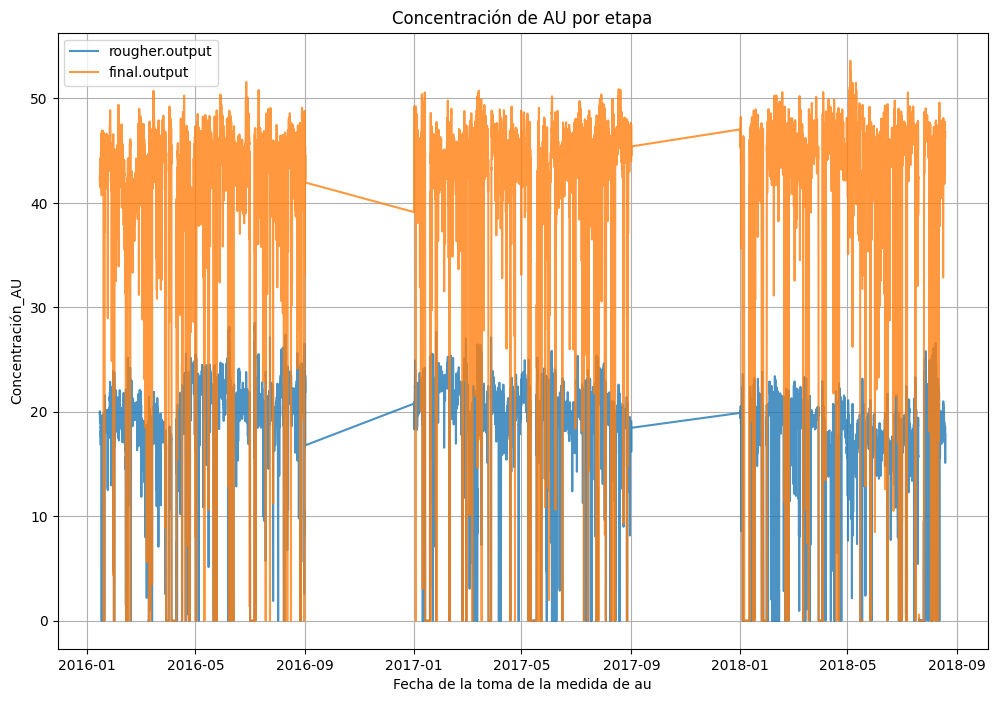

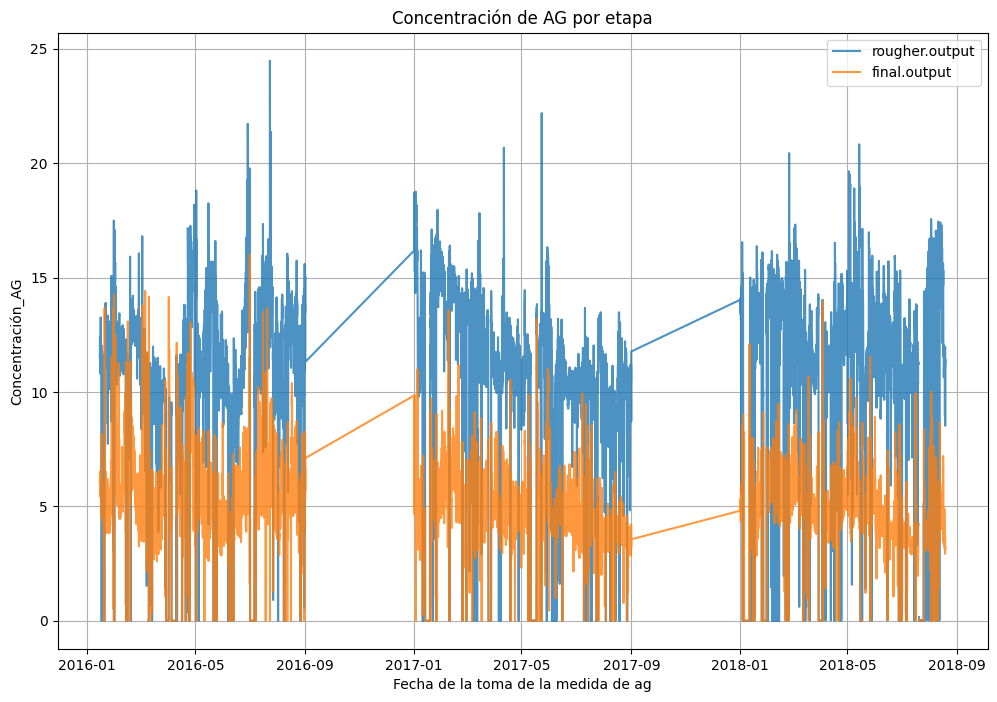

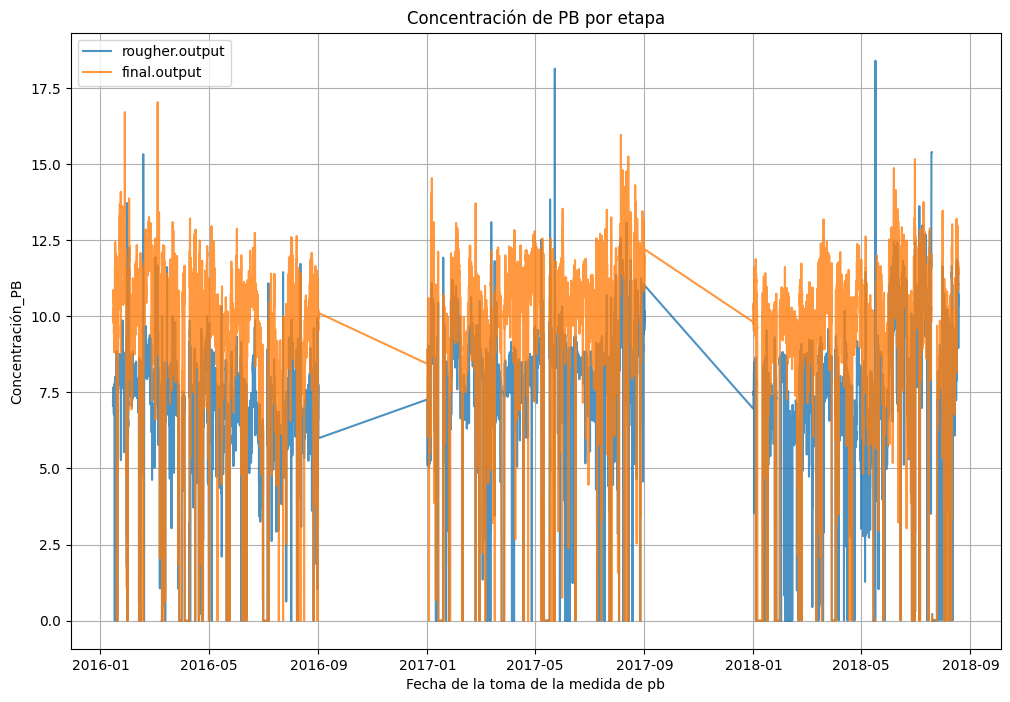

In [23]:
# Seleccionamos los metales que vamos a usar para la comparacón
for metal in ['au', 'ag', 'pb']:
    plt.figure(figsize=(12,8))
    # Selccionamos las etapas para nuestras graficas
    for stage in ['rougher.input', 'rougher.output', 'final.output']:
         # Condicional para las columnas si la columa tiene _ la selecciona si no intenta con un punto (.)
         col = f'{stage}.concentrate_{metal}' if f'{stage}.concentrate_{metal}' in df_train.columns else f'{stage}.concentrate.{metal}'
         # Condicional si la columan se encuentra dentro df_train imprime las grafica
         if col in df_train.columns:
              # Damos formato a nuestas graficas
              plt.plot(df_train[col], label=stage, alpha=0.80)
    plt.title(f'Concentración de {metal.upper()} por etapa')
    plt.legend()
    plt.ylabel(f'Concentración_{metal.upper()}')
    plt.xlabel(f'Fecha de la toma de la medida de {metal}')
    plt.grid(True)
    plt.show    

### Conclución 

Podemos ver en las tres gráficas tres bloques de datos los cuales nos indican que las mediciones solo se aplican por cierto tiempo, o que el funcionamiento de la maquinaria que realiza este proceso no se encuentra perdida todo el año, sería la primera pregunta que le haría al equipo técnico. 

Por otro lado podemos apreciar que el proceso Rougher tiene una variación interesante en los datos, ya que cuanta con picos hacia ambas direcciones, pero que en general se encuentra entre 25 y 12 % de concentración de `au` (Oro) después del proceso de flotación comparación de la concentración final que rondando entre 32 a 50 % de concentración de `au`(Oro) al finalizar el proceso completo.

A diferencia de au `ag` (Plata) tenemos unos resultados que vale la pena revisar, ya que la concentración final baja después más que la concentración después del proceso de flotado Roughter, por los datos obtenidos nos generan 2 preguntas, si es el objetivo bajar la cantidad de `au` (Plata) para obtener una mayor concentración de oro, o si el objetivo es incrementar la cantidad de plata extraída, si es la segunda pude ser que al aplicar la purificación se pierda mucho de este material

En caso del `pb` hay un ligero cambio de la concentración del metal del proceso de flotación a la concentración final, los rangos de `pb` están entre 3 y 15 % de concentración después del flotado, a diferencia de la concentración final que se encuentra entre 5 y 17 % de concentración.

Otro Punto importante que debemos de tomar en cuenta los picos que bajan a 0 sería importante revisar con la parte encargada de la maquinaria, porque se generan estas mediciones en 0 si las mediciones al inicio o al final del proceso es cuando se generan o si es un error en los sensores de la maquinaria

### 2.2 Distribución del tamaño de partícula de alimentación (train vs test)

- Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.


(16860, 86)
(5856, 52)
34.73309608540925


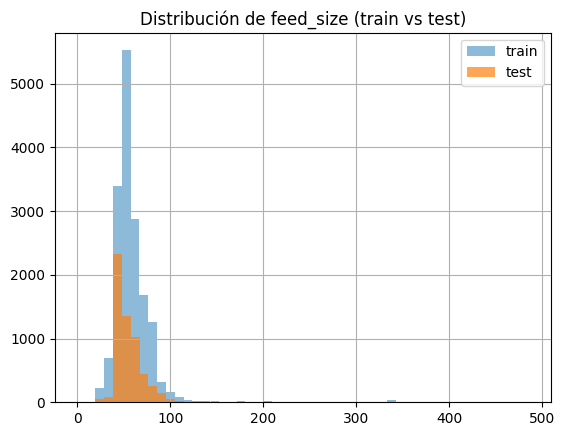

In [24]:
shape_train = df_train.shape
shape_test = df_test.shape
print(shape_train)
print(shape_test)
print((shape_test[0] / shape_train[0])*100)

for feed_size_col in ['rougher.input.feed_size']:
    if feed_size_col in df_train.columns and feed_size_col in df_test.columns:
        plt.figure()
        df_train[feed_size_col].hist(bins=50, alpha=0.5, label="train")
        df_test[feed_size_col].replace('ffill', None).hist(bins=50, alpha=0.7, label="test")
        plt.title("Distribución de feed_size (train vs test)")
        plt.legend()
        plt.show()
        
    else:
        print("No se encontró la columna esperada de feed_size. Revisa nombres en train/test.")

El conjunto de prueba es 34.72% del tamaño que el conjunto de entrenamiento

### 2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. 

- ¿Observas algún valor anormal en la distribución total? 

- Si  es así, ¿merece la pena eliminar esos valores de ambas muestras? 

- Describe los resultados y elimina las anomalías.

---

## 3. Construye el modelo

### 3.1. Escribe una función para calcular el valor final de sMAPE.

$$
\text{sMAPE} {\color{#2E6BFF}{=}} \frac{1}{N}\,{\color{#2E6BFF}{\sum}}_{i=1}^{N}
\frac{
{\color{#2E6BFF}{\lvert}}y_i{\color{#2E6BFF}{-}}\hat{y}_i{\color{#2E6BFF}{\rvert}}
}{
{\color{#2E6BFF}{(}}
{\color{#2E6BFF}{\lvert}}y_i{\color{#2E6BFF}{\rvert}}
{\color{#2E6BFF}{+}}
{\color{#2E6BFF}{\lvert}}\hat{y}_i{\color{#2E6BFF}{\rvert}}
{\color{#2E6BFF}{)}}
{\color{#2E6BFF}{/}}2
}
\,{\color{#2E6BFF}{\times}}100\%
$$


In [25]:
# Calcular sMAPE
def smape (y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + (np.abs(y_pred))))

$$
\text{sMAPE final}\;{\color{#2E6BFF}{=}}\;25\% \;{\color{#2E6BFF}{\times}}\; \text{sMAPE(rougher)}
\;{\color{#2E6BFF}{+}}\;75\% \;{\color{#2E6BFF}{\times}}\; \text{sMAPE(final)}
$$


In [26]:
# Formula aMAPE Final
def smape_final (rougher_smape, final_smape):
    return  (0.25 * rougher_smape) + (0.75 * final_smape)

### 3.2. Entrena diferentes modelos.

- Elige el mejor modelo y pruébalo utilizando la muestra de prueba.

- Evalúalos aplicando la validación cruzada. 

- Facilita los resultados.

- Utiliza estas fórmulas para las métricas de evaluación:

In [27]:
# 3.2.1 Entrenamos el modelo en el conjunto de Prueba
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas import concat

RANDOM_STATE = 54321

# Seleccionamos columnas objetivo (target)
target_cols = ['rougher.output.recovery', 'final.output.recovery']
# Nos quedamos mismas columas en ambos data sets
features = df_train.columns.intersection(df_test.columns)

# No usamos .drop('date') porque ya esta en el indice
train_filtered = df_train.dropna(subset=target_cols)

# Revisamos la perdida de filas de los valores nuelos en las filas
print(df_train.shape)
print(train_filtered.shape,'\n')

# Definimos los features en los datos de entrenamiento y 
X = train_filtered[features]
y_roughter = train_filtered['rougher.output.recovery']
y_final = train_filtered['final.output.recovery']

print("X:", X.shape)

# imputar valores faltantes en las carafceristicas
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(X)

# Divicion para validación 
x_train, x_valid, y_roughter_train, y_roughter_valid, y_final_train, y_final_valid = train_test_split(
    x_imputed, 
    y_roughter,
    y_final,
    test_size=0.2,
    random_state=RANDOM_STATE
)


model = RandomForestRegressor(max_depth=2, min_samples_split=5, n_estimators=20, random_state=RANDOM_STATE, n_jobs=-1)

y_multi = concat([y_roughter_train, y_final_train], axis=1)
print("y_multi:", y_multi.shape)

model.fit(x_train, y_multi)

(16860, 86)
(14149, 86) 

X: (14149, 52)
y_multi: (11319, 2)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",20
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at

In [28]:

print(x_train.shape)
print(x_valid.shape,'\n')


pred_valid = model.predict(x_valid)
print(pred_valid.shape,'\n')
print(y_multi.columns)

pred_roughter=  pred_valid[:, 0]
pred_final=  pred_valid[:, 1]

(11319, 52)
(2830, 52) 

(2830, 2) 

Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')


In [29]:
sampe_roughter =  smape(y_roughter_valid, pred_roughter)
print(f'sMAPE Roughter = {round(sampe_roughter, 4)} \n')

sampe_pre_final=  smape(y_final_valid, pred_final)
print(f'sMAPE Pre-Final = {round(sampe_pre_final, 4)} \n')

print('sMAPE Final =',(round(smape_final(sampe_roughter, sampe_pre_final),4)))


sMAPE Roughter = 10.9093 

sMAPE Pre-Final = 9.9498 

sMAPE Final = 10.1897


### K-fold cross validation (CV)

In [30]:
y_multi_K = concat([y_roughter, y_final], axis=1)
y_multi_K.shape


(14149, 2)

In [31]:
y_multi_K.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  14149 non-null  float64
 1   final.output.recovery    14149 non-null  float64
dtypes: float64(2)
memory usage: 331.6 KB


In [32]:
X.shape

(14149, 52)

In [33]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
import pandas as pd

# Formula sMAPE 
def smape(y_true, y_pred):

    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)

    denom = np.abs(y_true) + np.abs(y_pred)
    # Evitamos la división 0/0
    denom = np.where(denom == 0, 1.0, denom)
    # Retornamos el sMape
    return np.mean((2 * np.abs(y_pred - y_true) / denom)*100)

# Formula sMAPE final
def final_smape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    # Dividimos nuestros valores ya que tenemos 2 targets
    # calculamos cada uno por separado llamando a la funcion anterior 
    r = smape(y_true[:, 0], y_pred[:, 0])
    f = smape(y_true[:, 1], y_pred[:, 1])
    # Devolvemos el sMAPE Final como nuestra metriaca de Optimización
    return 0.25 * r + 0.75 * f

scorer = make_scorer(
    # Damos de alta nuestra metrica
    final_smape, 
    # Indicamos que queremos maximisar el error mas bajo.
    greater_is_better=False
    )

# Definimos los hiper Hiperparámetros que vamos a probar 
# En cada uno de de nuestros k folds 
param_grid = {
    'n_estimators':[50],
    'max_depth': [2, None],
    'random_state': [RANDOM_STATE],
    'min_samples_split': [2, 5]
    }

# Dividimos nuestros datos en cada fold en este caso son 2
cv = KFold(
    n_splits=2, 
    random_state=RANDOM_STATE, 
    shuffle=True
    )

# Cantidad de pruebas que haremos para cada cv (Validación Cruzada)
outer_cv = KFold(
    n_splits=3, 
    random_state=RANDOM_STATE, 
    shuffle=True,
    )

# Tomamos nuestro modelo y probamos los Hiperparámetros de param_grid
# Para cada combinacion hace 2 folds definidos con cv
# Usa la metrica que final_smape que definimos
# Nos da error si algo falla
clf_gs = GridSearchCV(
    RandomForestRegressor(
        random_state=RANDOM_STATE, n_jobs=-1),
    param_grid,
    cv=cv,
    scoring=scorer,
    error_score="raise",
    n_jobs=-1
    )

# Nested CV 
nested_scores = cross_val_score(
            clf_gs, 
            X, 
            y_multi_K.to_numpy(), 
            cv=outer_cv, 
            verbose=1,
            n_jobs=-1
            )
# imprimimpos los resultados de promedios de cada uno de nuestro cv_outer 
nested_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.7s finished


array([-7.26836332, -6.84403258, -6.99361795])

In [34]:
nested_scores.mean()*-1

np.float64(7.035337949063472)

Nuestro mejor modelo logra una sMAPE fianl de 7.2406 que es el menor error con la validacion crusada no se incluye los datos en el código de arriba ya que tardo 2 horas en processar todos los datos.

In [35]:
model = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=700, random_state=RANDOM_STATE, n_jobs=-1)


model.fit(x_train, y_multi)

print(x_train.shape)
print(x_valid.shape,'\n')


pred_valid = model.predict(x_valid)
print(pred_valid.shape,'\n')
print(y_multi.columns)

pred_roughter=  pred_valid[:, 0]
pred_final=  pred_valid[:, 1]

sampe_roughter =  smape(y_roughter_valid, pred_roughter)
print(f'sMAPE Roughter = {round(sampe_roughter, 4)} \n')

sampe_pre_final=  smape(y_final_valid, pred_final)
print(f'sMAPE Pre-Final = {round(sampe_pre_final, 4)} \n')

print('sMAPE Final =',(round(smape_final(sampe_roughter, sampe_pre_final),4)))

(11319, 52)
(2830, 52) 

(2830, 2) 

Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')
sMAPE Roughter = 8.035 

sMAPE Pre-Final = 6.9762 

sMAPE Final = 7.2409


## Clonclución

Hay algunos datos faltantes que se deberían revisar con el equipo técnico antes de generar una conclusión y realizar una tratamiento adecuado para los valores nulos vemos que `au`(Oro) y `pb`(Plomo) tienen una mejor concentración final, pasando del proceso de flotación a la etapa final después de la purificación al contrario del `ag`(Plata) que tenemos el resultado contrario, solo tenemos resultados una parte del año por lo que tenemos que revisar si la maquinaria solo se usa cierto tiempo del año o si bajo ciertas condiciones deja de medir.

En parte del modelo logramos un Error Porcentual Absoluto Medio Simétrico de 7.23 lo que nos acerca bastante al 0 y pude predecir con bastante exactitud `rougher.output.recovery` , `final.output.recovery` logrando así probar diferentes, proporciones de químicos, concentraciones de materiales, sin tener que hacer las pruebas directamente en la maquinaria logrando así la combinación más óptima para las variables para cada material.

## **Evaluación del proyecto**
Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

**Esto es lo que los revisores buscarán cuando evalúen tu proyecto:**

- ¿Has preparado y analizado los datos adecuadamente?

- ¿Qué modelos has desarrollado?
- ¿Cómo has comprobado la calidad del modelo?
- ¿Has seguido todos los pasos de las instrucciones?
- ¿Has respetado la estructura del proyecto y explicado los pasos realizados?
- ¿Cuáles son tus hallazgos?
- ¿Has mantenido el código limpio y has evitado su duplicación?

Ya tienes las hojas informativas y los resúmenes de los capítulos anteriores, así que ya puedes empezar.
¡Buena suerte!
